# <b>Fashion-Mnist</b>


# Intro


The dataset consisting of a training set of 60,000 examples and a test set of 10,000 examples.<br>
Each example is a 28x28 grayscale image, associated with a label from 10 classes.<br>
Each training and test example is assigned to one of the following labels:<br>
0 T-shirt/top<br>
1 Trouser<br>
2 Pullover<br>
3 Dress<br>
4 Coat<br>
5 Sandal<br>
6 Shirt<br>
7 Sneaker<br>
8 Bag<br>
9 Ankle boot<br>

# Loading libraries


In [1]:
from matplotlib import pyplot
import tensorflow as tf
from sklearn.datasets import fetch_openml
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# <b>Loading dataset</b>


In [2]:
data = pd.read_csv(r"C:\Users\yuval\fashion-mnist_train.csv")
data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Presenting an image for exampleHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH

In [4]:
# Convert NumPy array back to Pillow image
#img = Image.fromarray(img_array)


# Data cleaning
## <b>know and organize the dataset</b>

In [5]:
# check the shape of the DataFrame (rows, columns)
data.shape #8101 colums because we add the DogORCat column

(60000, 785)

**Explanation about the columns and rows:**<br>

**What are the features?**<br>
60000 rows- every row represent list of pixels in the image.<br>
The first row of pixels in the image is the first 28 cells in a row in the df, the next 28 cells are the seconed row of pixels in the image, etc. .<br>
784 columns of pixels- After I set a uniform size for all the images, the size is 28*28, therefore there are 784 rows, plus 1 row .


**What is the response?**<br>
label-What item of clothing is this from the list I have written above (in range of 1-9).<br>

## <b>Duplicate Values</b>

If there are duplicate values- means that specific image appear few times, therefore I would like to delete them.

In [6]:
data=data.drop_duplicates()#By default, it removes duplicate rows based on all columns.

data.shape

(59957, 785)

**Conclusion**

In [7]:
#There were 60000 rows and now there are 59957 means we deleted 60000-59957=43 duplicate rows, we will write it at precentage:
print ("Percent of duplicate images I deleted:", (43*100)/60000,"%")

Percent of duplicate images I deleted: 0.07166666666666667 %


## <b>Invalid images</b>

If there are invalid images such as black images or white images etc - therefore there will be same pixel value in all the row of the specific image, so I want to delete it.<br>
In addition, If there are images with missing pixels, I would like to delete it too.<br>
Examples for invalid images:

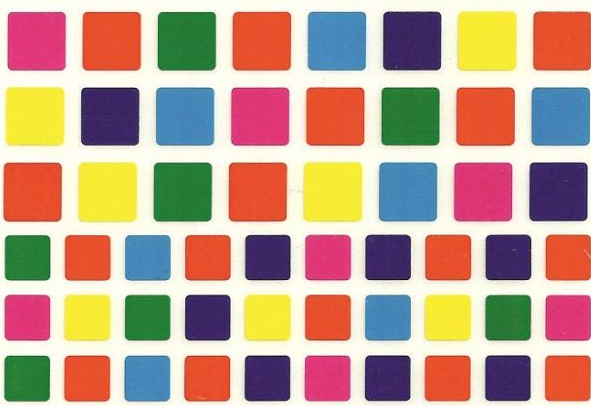

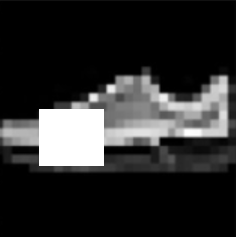

In [8]:
data=data[data.nunique(1)>1]
data.shape

(59957, 785)

**Conclusion**<br>
The shape is the same, so we will conclude that there are no invalid images.<br>

## <b>Nan Values</b>
Another thing I would like to check is if there are any images that are missing pixels.<br>
This will be expressed in df by having Nan values.<br>
Lets check if there are Nan values.

In [9]:
#check for null values
print("There are",data.isnull().sum().sum(),"null values in df.")

There are 0 null values in df.


### Plot the distribution of the data

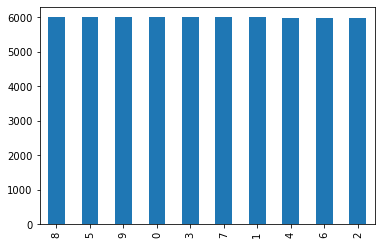

In [10]:
data['label'].value_counts().plot.bar()
plt.show()

**Conclusion**<br>
There is equal distribution of the data.

# <b> Split </b>

In [11]:
from sklearn.model_selection import train_test_split #to perform the splitting

In [12]:
#split the data into labels and features 
y=data.label #label is the label we want to predict
x=data.drop('label',axis=1)#use drop function to take all other data in x

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)#we will tale 30% of the dataset to testing and the rest for training
#by write random_state=42 we will get same data (same values) in train and test datasets every rime we ran this code.

# <b>Dimensionality Reduction </b>

# PCA -Principal Component Analysis

PCA is the most popular dimensionality reduction algorithm.<br>
First it identifies the hyperplane that lies closest to the data, and then it projects the data onto it.<br>

# Data Scaling 

By using PCA I will try to reduce those dimensions into smaller number of dimensions, which will be creating a new vector space. <br>
First thing I want to do is **Min-Max scaling**.<br>
Min-max scaling (normalization) is way to get all attributes to have the same scale values, by the way they are shifted and rescaled so that they end up ranging from 0 to 1.<br>
We do this by subtracting the min value and dividing by the max minus the min.<br>
Scikit-Learn provides a transformer called MinMaxScaler for this.<br>
It has a feature_range hyperparameter that let change the range if, for some reason, you don’t want 0–1.<br>

The main reason for doing Min-Max scaling, is that as it is possible to see the difference between the values of all coulumns will be very high.<br>

As I read in web, for a grayscale images, the pixel value is a single number that represents the brightness of the pixel.<br>
The most common pixel format is the byte image, where this number is stored as an 8-bit integer giving a **range of possible values from 0 to 255.**<br>
Typically 0 is taken to be black, and 255 is taken to be white.<br>

To represent color images, separate red, green and blue components must be specified for each pixel (assuming an RGB colorspace),<br>
and so the pixel "value" is actually a vector of three numbers.<br>
Often the three different components are stored as three separate "grayscale" images known as color planes (one for each of red, green and blue),<br>
which have to be recombined when displaying or processing.<br>

**Therefore, the range of the columns (beside the label column) is 0-255.**<br>
It is also possible to see it by the methods:<br>
data.max() <br>
data.min() 


## Importing additional libraries

In [14]:
from sklearn.preprocessing import MinMaxScaler


In [15]:
#We will scale the x_train set
scaler = MinMaxScaler()
scaler.fit(x_train)#this is the train part from the secondary split

scaled_data=scaler.transform(x_train)# We get array 
x_train_scaled= pd.DataFrame(scaled_data)#turn into df
x_train_scaled

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.004464,0.000000,0.000000,0.000000,...,0.000000,0.007843,0.000000,0.000000,0.411765,0.556863,0.729412,0.296443,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.043137,0.098039,0.094118,0.086275,0.098814,0.035294,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.004405,0.0,0.026786,0.311111,0.413386,0.290196,...,0.000000,0.011765,0.000000,0.152941,0.513725,0.070588,0.000000,0.000000,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.600000,...,0.086275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41964,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.188235,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
41965,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.044444,0.346457,0.000000,...,0.368627,0.372549,0.423529,0.196078,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
41966,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.055118,0.384314,...,0.760784,0.282353,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
41967,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [16]:
#We will scale the x_test set
scaled_data_test=scaler.transform(x_test)# We get array 
x_test_scaled= pd.DataFrame(scaled_data_test)#turn into df
x_test_scaled

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.015686,...,0.709804,0.701961,0.729412,0.792157,0.788235,0.890196,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.031373,...,0.474510,0.262745,0.000000,0.000000,0.043137,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.674510,0.647059,0.623529,0.023529,0.000000,0.007843,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.494118,0.635294,0.160784,0.000000,0.396078,0.203922,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17983,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.682353,0.690196,0.709804,0.105882,0.000000,0.000000,0.0,0.0,0.0,0.0
17984,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.349020,0.415686,0.266667,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
17985,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.027451,...,0.101961,0.121569,0.086275,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
17986,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


We can see the data has been converted into new dataframe , and this is based on the standard deviation as 1, and mean is equal to 0. <br>
Now we will apply the PCA.<br>

In [17]:
x_train_scaled.shape

(41969, 784)

# Back to PCA

## Importing additional libraries


In [18]:
from sklearn.decomposition import PCA
from sklearn import preprocessing #this package gives us functions for scaling the data before performing PCA


Before I will do the PCA, Iwant to see again the data: 

In [19]:
x_train_scaled.tail (10)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
41959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
41960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
41961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.019608,0.027451,0.043137,0.066667,0.0,0.0,0.0,0.0,0.0,0.0
41962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
41963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
41964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.188235,0.066667,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
41965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.044444,0.346457,0.000000,...,0.368627,0.372549,0.423529,0.196078,0.0,0.0,0.0,0.0,0.0,0.0
41966,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.055118,0.384314,...,0.760784,0.282353,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
41967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
41968,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.588235,...,0.196078,0.058824,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
print("Data has",len(x_train_scaled.columns),"features." ) 

Data has 784 features.


In [21]:
#From the total dimensions, I want to set n_components to be a float between 0.0 and 1.0, 
#indicating the ratio of variance I wish to preserve, in this case I will choose 0.95:
 
pca = PCA(n_components = 0.95)

#fit the scaled data
X_train_Reduced=pca.fit_transform(x_train_scaled)

#transform the PCA by using the PCA object for the scaled data
X_test_Reduced=pca.transform(x_test_scaled)


In [22]:
#We get an array
X_train_Reduced
#So we will turn it into df
X_train_Reduced = pd.DataFrame(X_train_Reduced)
#and check the shape of it to see how it change
X_train_Reduced.shape

(41969, 187)

It is possible to see the difference by the number of columns- 8100 columns to x_train_scaled, and different number after the PCA.

In [23]:
print ('\033[1m' , 'Conclusion' , '\033[0m')
print("After the PCA , dimensions dropped from 8100 to", len(X_train_Reduced.columns),".")
print("Means that dimensions decreased by", 100-((len(X_train_Reduced.columns)*100)/8100), "%")



 Conclusion 
After the PCA , dimensions dropped from 8100 to 187 .
Means that dimensions decreased by 97.69135802469135 %


# <b> Ensemble Learning<b>
Building a model on top of many other models is called Ensemble Learning.<br>
More extensively, if you aggregate the predictions of a group of predictors (such as classifiers in current project), you will
often get better predictions than with the best individual predictor.<br>
In this part of the project I will try to improve my previous project results by using Ensemble Learning. <br>
    
While finding the model with the best accuracy, I would like to check what model is with the best run time.<br>


In [24]:
#Therefore , to find the best run time, I need to import the time library.
import time

#Initialize an empty array of model's running times
RunningTimes=[]

#Initialize an empty array of model's names
ModelName=[]

#Initialize an empty array of model's accuracies
Accuracies=[]

First of all, I will show the model 'Random Forest'.<br>

# <b> Random Forest<b>
    
Random Forest is the Ensemble Learning of Decision Trees.<br>                                                             Random Forests as we learned, is a supervised learning algorithm.<br>                                                           There is a direct relationship between the number of trees in the forest and the results it can get. It uses a number of decision trees and predicts the more accurate result by voting in case of classification (or averaging in case of regression).<br>
    
         
## Explain about method's parameters<b>
**n_estimators** -  The number of trees in the forest,the more estimators you give it, the better it will do.<br>
From what I have been reading, 500 or 1000 is usually sufficient.<br>
**n_jobs** -  the number of CPU cores to use for training and predictions (–1 tells Scikit-Learn to use all available cores).<br>
**random_state**- is be used to set the internal parameters initially, so you can repeat the training deterministically.<br>
    
## Importing additional libraries

In [25]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score

## Fit & Predict

In [28]:
#Start measuring running time
StartTimeRF = time.time()

# instantiate the model
RForest= RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=0)

# fit the model with data
RForest.fit(X_train_Reduced, y_train)

#make predictions on the testing set (predict for first_test)
RForestPred = RForest.predict(X_test_Reduced)

#Finish measuring running time
EndTimeRF = time.time()

#Toal running time
TotalTimeRF= EndTimeRF - StartTimeRF

#Add model's running time to RunningTimes array, and name to ModelName array
RunningTimes.append(TotalTimeRF)
ModelName.append('RF')

**Accuracy,Classification Error (Misclassification Rate) :** Overall, how often is the classifier incorrect?<br>

In [29]:
accuracyRForest = metrics.accuracy_score(y_test, RForestPred)#check the predictions with the real values

print("The Accuracy of this model, after PCA is:",accuracyRForest)
print("the Classification Error for this model, after PCA is:", 1 - accuracyRForest)
#Add model's accuracy to Accuracies array
Accuracies.append(accuracyRForest)

The Accuracy of this model, after PCA is: 0.8691905714921059
the Classification Error for this model, after PCA is: 0.13080942850789412


## Model evaluation metrics for classification

### Confusion Matrix

To visualize how many values the Random Forest classifier predicted correctly, <br>
I will compute confusion_matrix by using Scikit-Learn’s confusion_matrix() function:

In [30]:
from sklearn.metrics import confusion_matrix
CM_RF=confusion_matrix(y_test,RForestPred)
CM_RF#It's a 10x10 matrix because there are 10 response classes (0-9)

array([[1525,    1,   38,   64,   11,    4,   98,    0,   35,    0],
       [   5, 1751,   12,   60,    4,    0,    8,    0,    3,    0],
       [  13,    0, 1408,   12,  176,    1,   91,    0,   16,    0],
       [  48,    5,   10, 1689,   45,    1,   49,    0,    9,    1],
       [   2,    1,  147,   86, 1458,    0,   91,    0,   19,    0],
       [   1,    0,    0,    2,    0, 1652,    0,   61,    7,   45],
       [ 323,    0,  184,   47,  152,    3, 1006,    0,   40,    0],
       [   0,    0,    0,    0,    0,   64,    0, 1695,    4,   74],
       [   1,    0,    7,   16,   10,   23,   18,    3, 1745,    3],
       [   0,    0,    0,    0,    1,   28,    0,   68,    2, 1706]],
      dtype=int64)

Lets show Confusion Matrix as heat map:

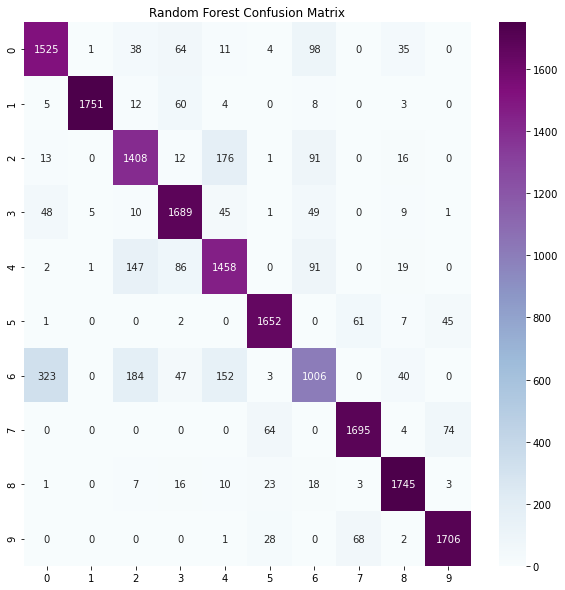

In [31]:
import seaborn as sns

plt.figure(figsize=(10,10))#set size
sns.heatmap(CM_RF,cmap = "BuPu", annot=True, fmt = '.0f')
plt.title ('Random Forest Confusion Matrix')
plt.show()

**Conclusion**<br>
The main left diagonal represent all the cases that the model predict correctly (TN,TP).<br>
The rest cells represent all the cases the model predict incorrectly (FP,FN).<br>

Therefore, It can be concluded that the least good predicted label with Random Forest model is 'Shirt'(label number 6),<br>
and the most good predicted label is 'Trouser'(label number 1).<br>

### Classification Report

Let's compute precision, recall, f1-score and accuracy by using Scikit-Learn’s classification_report() method:


In [32]:
from sklearn.metrics import classification_report
print (classification_report(y_test,RForestPred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1776
           1       1.00      0.95      0.97      1843
           2       0.78      0.82      0.80      1717
           3       0.85      0.91      0.88      1857
           4       0.79      0.81      0.80      1804
           5       0.93      0.93      0.93      1768
           6       0.74      0.57      0.65      1755
           7       0.93      0.92      0.93      1837
           8       0.93      0.96      0.94      1826
           9       0.93      0.95      0.94      1805

    accuracy                           0.87     17988
   macro avg       0.87      0.87      0.87     17988
weighted avg       0.87      0.87      0.87     17988



**Conclusion**<br>

As we learned, **Precision** answer the question- What proportion of positive identifications was actually correct,<br>
and equal to:<br>
    $Precision=\frac {TP }{TP+FP}$ <br>
    
**Recall**, answer the question- What proportion of actual positives was identified correctly,<br>
and equal to:<br>
 $Recall=\frac {TP }{TP+FN}$ <br>

**F1 score** is defined as the harmonic mean between precision and recall, and It formula is:<br>
In cats:   $F1 score=2 \times \frac{Precision \times Recall}{Precision+ Recall}$<br>

Therefore , it can be concluded that label number 1 has the least FP,<br>
and label number 6 has the most FP.<br>

# Boosting

Boosting refers to a family of algorithms that are able to convert weak learners to strong learners.<br>
The predictions are then combined through a weighted majority vote in case of classification (or a weighted sum in case of regression) to produce the final prediction.<br>
The models I will show are: AdaBoost, Gradient Boosting (XGBoost).<br>

# <b> AdaBoost <b>
    
AdaBoost is the seconed model I will train.<br>
This model gives more attention to the training instances that the predecessor underfitted.<br>
This results in new predictors focusing more and more on the hard cases.<br>

## Explain about method's parameters<b>
**n_estimators**- Number of weak learners to train iteratively.<br>
**learning_rate**- Shrinks the contribution of each classifier. It uses 1 as a default value.<br>
    There is a trade-off between n_estimators to learning_rate. <br>
    
## Importing additional libraries

In [33]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

## Fit & Predict

In [34]:
#Start measuring running time
StartTimeADA = time.time()

# instantiate the model
DecisionTreeClf = DecisionTreeClassifier(max_depth=1)
ada_clf = AdaBoostClassifier(DecisionTreeClf, n_estimators=100, learning_rate=0.5)

# fit the model with data
ada_clf.fit(X_train_Reduced, y_train)

#make predictions on the testing set (predict for first_test)
ada_clfPred = ada_clf.predict(X_test_Reduced)

#Finish measuring running time
EndTimeADA = time.time()

#Toal running time
TotalTimeADA = EndTimeADA - StartTimeADA

#Add model's running time to RunningTimes array, and name to ModelName array
RunningTimes.append(TotalTimeADA)
ModelName.append('ADA')

**Accuracy,Classification Error (Misclassification Rate) :**

In [35]:
accuracyAda = metrics.accuracy_score(y_test, ada_clfPred)#check the predictions with the real values

print("The Accuracy of this model is:",accuracyAda)
print("the Classification Error for this model is:", 1 - accuracyAda)
#Add model's accuracy to Accuracies array
Accuracies.append(accuracyAda)

The Accuracy of this model is: 0.5870580386924616
the Classification Error for this model is: 0.41294196130753835


## Model evaluation metrics for classification

### Confusion Matrix

To visualize how many values the ADA Boost classifier predicted correctly, <br>
I will compute confusion_matrix by using Scikit-Learn’s confusion_matrix() function:

In [36]:
CM_ADA=confusion_matrix(y_test,ada_clfPred)
CM_ADA

array([[ 949,   10,   45,  562,    4,    0,  135,    0,   71,    0],
       [   9,  320,   27, 1473,    3,    0,    8,    0,    3,    0],
       [  16,    2, 1291,   22,   89,    1,  207,    0,   89,    0],
       [  44,   55,   30, 1602,   71,    0,   45,    0,    9,    1],
       [   3,    1, 1020,  181,  329,    2,  172,    0,   96,    0],
       [   2,    0,    0,    2,    0, 1435,    0,  217,   41,   71],
       [ 232,    6,  768,  256,   75,    4,  291,    0,  123,    0],
       [   0,    0,    0,    0,    0,  382,    0, 1399,   11,   45],
       [  14,    0,   44,   41,    2,   19,   22,    6, 1676,    2],
       [   0,    0,    0,    0,    0,  281,    0,  252,    4, 1268]],
      dtype=int64)

Lets show Confusion Matrix as heat map:

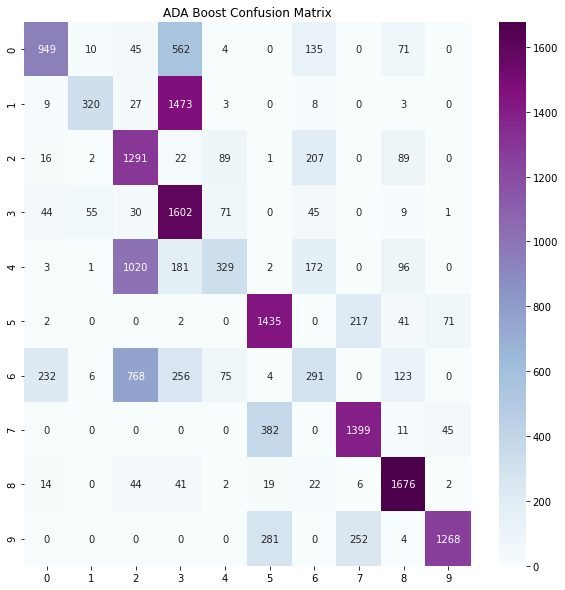

In [37]:
plt.figure(figsize=(10,10))#set size
sns.heatmap(CM_ADA,cmap = "BuPu", annot=True, fmt = '.0f')
plt.title ('ADA Boost Confusion Matrix')
plt.show()

**Conclusion**<br>
It can be concluded that the least good predicted label with Ada Boost model is 'Shirt'(label number 6),<br>
and the most good predicted label is 'Bag'(label number 8).<br>

### Classification Report

Let's compute precision, recall, f1-score and accuracy by using Scikit-Learn’s classification_report() method:

In [38]:
print (classification_report(y_test,ada_clfPred))

              precision    recall  f1-score   support

           0       0.75      0.53      0.62      1776
           1       0.81      0.17      0.29      1843
           2       0.40      0.75      0.52      1717
           3       0.39      0.86      0.53      1857
           4       0.57      0.18      0.28      1804
           5       0.68      0.81      0.74      1768
           6       0.33      0.17      0.22      1755
           7       0.75      0.76      0.75      1837
           8       0.79      0.92      0.85      1826
           9       0.91      0.70      0.79      1805

    accuracy                           0.59     17988
   macro avg       0.64      0.59      0.56     17988
weighted avg       0.64      0.59      0.56     17988



**Conclusion**<br>
As you already see, I have written below the formulas of precision, recall and F1-Score.<br>
Therefore , it can be concluded that label number 9 has the least FP,<br>
and label number 6 has the most FP.<br>

# Gradient Boosting

Just like AdaBoost,Gradient Boosting works by sequentially adding predictors to an ensemble, each one correcting its predecessor.<br>
However, instead of tweaking the instance weights at every iteration like AdaBoost does, <br>
this method tries to fit the new predictor to the residual errors made by the previous predictor.

# <b> XGBoost  <b>
    
XGBoost is the third model I will train.<br>
XGBoost is an optimized implementation of Gradient Boosting , which stands for Extreme Gradient Boosting.<br>
This model have enhanced performance and speed in tree-based (sequential decision trees) machine learning algorithms.<br>
It is the most common algorithm used for applied machine learning in competitions and has gained popularity through winning solutions in structured and tabular data

## Explain about method's parameters<b>

**learning_rate**- Shrinks the contribution of each classifier. It uses 1 as a default value.<br>
There is a trade-off between n_estimators to learning_rate.<br>
**n_estimators**- Number of weak learners to train iteratively.<br>
**verbosity**- Verbosity of printing messages. Valid values of 0 (silent), 1 (warning), 2 (info), and 3 (debug).<br>
**use_label_encoder**-  Use the label encoder from scikit-learn to encode the labels. <br>
For new code, It is recommend to set this parameter to False.

## Importing additional libraries




In [40]:
import xgboost as xgb
from xgboost import XGBClassifier
import warnings

## Fit & Predict

In [41]:
#Start measuring running time
StartTimeXG = time.time()

# instantiate the model
XGBoost = XGBClassifier(learning_rate = 0.2, n_estimators = 2000, verbosity=0,use_label_encoder=False)

# fit the model with data
XGBoost.fit(X_train_Reduced, y_train)

#make predictions on the testing set (predict for first_test)
XGBoost_Pred = XGBoost.predict(X_test_Reduced)

#Finish measuring running time
EndTimeXG = time.time()

#Toal running time
TotalTimeXG = EndTimeXG - StartTimeXG

#Add model's running time to RunningTimes array, and name to ModelName array 
RunningTimes.append(TotalTimeXG)
ModelName.append('XG')

**Accuracy,Classification Error (Misclassification Rate) :**

In [42]:
accuracyXG = metrics.accuracy_score(y_test, XGBoost_Pred)#check the predictions with the real values

print("The Accuracy of this model is:",accuracyXG)
print("the Classification Error for this model is:", 1 - accuracyXG)
#Add model's accuracy to Accuracies array
Accuracies.append(accuracyXG)

The Accuracy of this model is: 0.8925394707582833
the Classification Error for this model is: 0.10746052924171667


## Model evaluation metrics for classification

### Confusion Matrix

To visualize how many values the XG Boost classifier predicted correctly, <br>
I will compute confusion_matrix by using Scikit-Learn’s confusion_matrix() function:

In [43]:
CM_XG=confusion_matrix(y_test,XGBoost_Pred)
CM_XG

array([[1529,    5,   36,   50,    7,    1,  128,    0,   19,    1],
       [   5, 1784,    4,   40,    3,    0,    4,    0,    3,    0],
       [  21,    1, 1423,   13,  148,    2,  101,    1,    7,    0],
       [  46,    7,   12, 1694,   43,    1,   46,    0,    6,    2],
       [   4,    2,  119,   67, 1504,    0,   94,    0,   14,    0],
       [   1,    0,    0,    2,    0, 1687,    0,   52,    6,   20],
       [ 228,    3,  153,   48,  107,    1, 1196,    0,   19,    0],
       [   0,    0,    0,    0,    0,   34,    0, 1751,    3,   49],
       [   6,    1,    5,   10,    7,    4,   20,    3, 1767,    3],
       [   0,    0,    0,    0,    0,   21,    0,   62,    2, 1720]],
      dtype=int64)

Let's show Confusion Matrix as heat map:

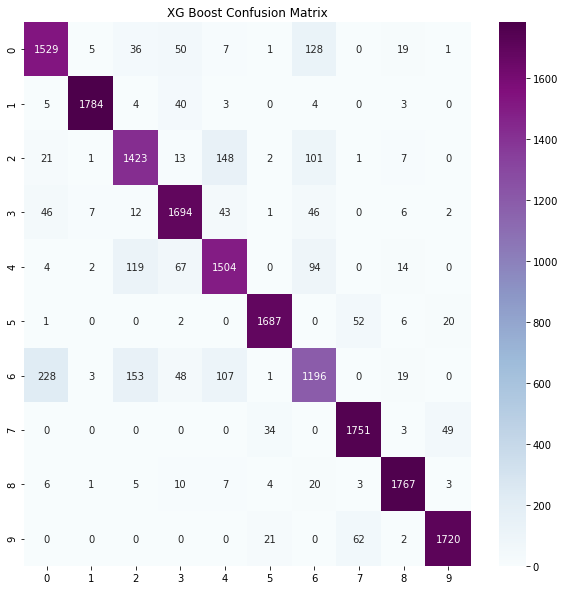

In [44]:
plt.figure(figsize=(10,10))#set size
sns.heatmap(CM_XG,cmap = "BuPu", annot=True, fmt = '.0f')
plt.title ('XG Boost Confusion Matrix')
plt.show()

**Conclusion**<br>
It can be concluded that the least good predicted label with XGBoost model is 'Shirt'(label number 6),<br>
and the most good predicted label is 'Trouser'(label number 1 ).<br>

### Classification Report

Let's compute precision, recall, f1-score and accuracy by using Scikit-Learn’s classification_report() method:

In [45]:
print (classification_report(y_test,XGBoost_Pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1776
           1       0.99      0.97      0.98      1843
           2       0.81      0.83      0.82      1717
           3       0.88      0.91      0.90      1857
           4       0.83      0.83      0.83      1804
           5       0.96      0.95      0.96      1768
           6       0.75      0.68      0.72      1755
           7       0.94      0.95      0.94      1837
           8       0.96      0.97      0.96      1826
           9       0.96      0.95      0.96      1805

    accuracy                           0.89     17988
   macro avg       0.89      0.89      0.89     17988
weighted avg       0.89      0.89      0.89     17988



**Conclusion**<br>
As you already see, I have written below the formulas of precision, recall and F1-Score.<br>
Therefore , it can be concluded that label number 1 has the least FP,<br>
and label number 6 has the most FP.<br>

# Simple Classification models<br>

Let's start implementing simple classification models we learned last semester, and then return to ensemble models.
I will explain this decision later.<br>

## <b>KNN model</b>
### <b> Which n_neighbors should I choose?<b>
    
First of all I ran for loop about different n_neighbors and checked the accuracy for eack case, <br>
then I chose the n_neighbors that gave me the most accurate value:<br>


In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Please do not run this cell,It is very long time to be loaded
#i ran it in the start to see which n neighbors will be the best to choose
scores=[]
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)

#fit the model with data
    knn.fit(X_train_Reduced, y_train)

# predict the response for new observations
    from sklearn.model_selection import cross_val_score #import cross validation method

    score=cross_val_score(knn,X_train_Reduced, y_train,cv=2).mean()
    print("Accuracy for k="+str(i)+" is "+str(score) )
    scores.append(score)
    

Accuracy for k=1 is 0.8335676405391321
Accuracy for k=2 is 0.833376981643025
Accuracy for k=3 is 0.8424551419686792
Accuracy for k=4 is 0.8444089638942036
Accuracy for k=5 is 0.8451475935328059
Accuracy for k=6 is 0.8463151315987283
Accuracy for k=7 is 0.8445519606210743
Accuracy for k=8 is 0.8454335744964611


In [ ]:
#This is the array of all the accuracies according to different n neighbors
scores

In [ ]:
#Let's plot the relation between n and testing accuracy
n_neigh=list(range(1,20))
plt.plot(n_neigh,scores)
plt.ylabel('Cross-Validation Testing Accuracy')#show the number of 0.9999X, means- 7,5,,6,4,4,3,3,1.....
plt.show()

In [ ]:
#Let's find the max accuracy in 'score' array:
import numpy as np
max_value = np.max(scores)
max_value
#find the index of this max score
index_maxScore=scores.index(max_value)
index_maxScore
print('\033[1m' , 'Conclusion' , '\033[0m')
print('It can be concluded that the best accuracy of KNN model is:',max_value)
print("and It received when the number of neighbors is equal to:", index_maxScore+1.)


## Fit&Predict

In [ ]:
#Start measuring running time
StartTimeKNN = time.time()

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=6)

# fit the model with data
knn.fit(X_train_Reduced, y_train)


# make predictions on the testing set (predict for first_test)
Knn_Pred=knn.predict(X_test_Reduced)

#Finish measuring running time
EndTimeKNN = time.time()

#Toal running time
TotalTimeKNN = EndTimeKNN - StartTimeKNN

#Add model's running time to RunningTimes array, and name to ModelName array 
RunningTimes.append(TotalTimeKNN)
ModelName.append('KNN')

**Accuracy,Classification Error (Misclassification Rate) :**

In [ ]:
accuracyKNN = metrics.accuracy_score(y_test, Knn_Pred)#check the predictions with the real values

print("The Accuracy of this model is:",accuracyKNN)
print("the Classification Error for this model is:", 1 - accuracyKNN)
#Add model's accuracy to Accuracies array
Accuracies.append(accuracyKNN)

## Model evaluation metrics for classification

### Confusion Matrix

To visualize how many values the KNN classifier predicted correctly, <br>
I will compute confusion_matrix by using Scikit-Learn’s confusion_matrix() function:

In [ ]:
CM_KNN=confusion_matrix(y_test,Knn_Pred)
CM_KNN#It's a 2x2 matrix because there are 2 response classes (0,1)

Lets show Confusion Matrix as heat map:

In [ ]:
plt.figure(figsize=(10,10))#set size
sns.heatmap(CM_KNN,cmap = "BuPu", annot=True, fmt = '.0f')
plt.title ('KNN Confusion Matrix')
plt.show()

**Conclusion**<br>HHHHHHHHHHHHHHHHHHHHHHHHH
It can be concluded that the least good predicted label with XGBoost model is '____'(label number ),<br>
and the most good predicted label is '_____'(label number ).<br>


### Classification Report

In [ ]:
print (classification_report(y_test,Knn_Pred))

**Conclusion**<br> HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH
As you already see, I have written below the formulas of precision, recall and F1-Score.<br>
Therefore , it can be concluded that label number 1,5 has the least FP,<br>
and label number 6 has the most FP.<br>

## <b>Logistic Regression model</b>

In [ ]:
from sklearn.linear_model import LogisticRegression

#Start measuring running time 
StartTimeLR = time.time()

# instantiate the model (using the default parameters)
log_reg = LogisticRegression(max_iter=400)

# fit the model with data
log_reg.fit(X_train_Reduced, y_train)

#make predictions on the testing set
Log_Pred = log_reg.predict(X_test_Reduced)

#Finish measuring running time
EndTimeLR = time.time()

#Toal running time  
TotalTimeLR = EndTimeLR - StartTimeLR

#Add model's running time to RunningTimes array, and name to ModelName array 
RunningTimes.append(TotalTimeLR)
ModelName.append('Logistic_Regression')


**Accuracy,Classification Error (Misclassification Rate) :**

In [ ]:
accuracyLR = metrics.accuracy_score(y_test, Log_Pred)#check the predictions with the real values

print("The Accuracy of this model is:",accuracyLR)
print("the Classification Error for this model is:", 1 - accuracyLR)
#Add model's accuracy to Accuracies array
Accuracies.append(accuracyLR)

## Model evaluation metrics for classification

### Confusion Matrix

To visualize how many values the KNN classifier predicted correctly, <br>
I will compute confusion_matrix by using Scikit-Learn’s confusion_matrix() function:

In [ ]:
CM_LR=confusion_matrix(y_test,Log_Pred)
CM_LR

Lets show Confusion Matrix as heat map:

In [ ]:
plt.figure(figsize=(10,10))#set size
sns.heatmap(CM_LR,cmap = "BuPu", annot=True, fmt = '.0f')
plt.title ('Logistic Regression Confusion Matrix')
plt.show()

**Conclusion**<br>HHHHHHHHHHHHHHHHHHHHHHHHH
It can be concluded that the least good predicted label with XGBoost model is '____'(label number ),<br>
and the most good predicted label is '_____'(label number ).<br>


### Classification Report

In [ ]:
print (classification_report(y_test,Log_Pred))

**Conclusion**<br>HHHHHHHHHHHHHHHHHHHHHHHHHH
As you already see, I have written below the formulas of precision, recall and F1-Score.<br>
Therefore , it can be concluded that label number 1,5 has the least FP,<br>
and label number 6 has the most FP.<br>


# Subtotal Of All Models Accuracies&RunTime

In [ ]:
#Create array of all accuracies:

print(Accuracies)
print(ModelName)

#define df
data = pd.DataFrame({'Model': ModelName, 'Accuracies': list(Accuracies), 'RunTime':list(RunningTimes)}, columns=['Model', 'Accuracies', 'RunTime'])

data

# Back To Ensemble learning Models

Now, After I finished the implement of the simple classification models, I would like to continue with the Ensemble learning Models. <br>
I have preferred to implement those simple classification models before using the models: Bagging, Stacking, Voting  
because those three models may use part  (or all) those simple classification models. <br>
It explain in each model in detail later in the notebook.<br>

# <b> Bagging&Pasting  <b>
    
Bagging stands for bootstrap aggregation. One way to reduce the variance of an estimate is to average together multiple estimates. For aggregating the outputs of base learners in case of classification, bagging uses Voting (and averaging in case of regression).<br>
For example, random forest trains X Decision Tree, It is possible to train X different trees on different random subsets of the data and perform voting for final prediction.<br>
Bagging ensembles methods are Random Forest and Extra Trees.<br>
    
In other words, Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset,<br> and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction.
    
Bagging is composed of two parts: aggregation and bootstrapping.<br>
Bootstrapping is a sampling method, where a sample is chosen out of a set, using the replacement method. <br>
The learning algorithm is then run on the samples selected.<br>

The bootstrapping technique uses sampling with replacements to make the selection procedure completely random. <br>
When a sample is selected without replacement, the subsequent selections of variables are always dependent on the previous selections, making the criteria non-random. <br>   
    
When sampling is performed without replacement, it is called **pasting**.<br>

In other words, both bagging and pasting allow training instances to be sampled several times across multiple predictors,<br>
but only bagging allows training instances to be sampled several times for the same predictor.<br>
    
## Explain about method's parameters<b>

**base_estimator**-The base estimator to fit on random subsets of the dataset. If None, then the base estimator is a Decision Tree Classifier.In my case, I have chosed XGBoost because It is the model with the best accuracy til now.<br>
**n_estimators**- The number of base estimators in the ensemble <br>
**bootstrap**- Whether samples are drawn with replacement (as I explained above). If False, sampling without replacement is performed.   <br>

# Bagging

## Importing additional libraries


In [ ]:
from sklearn.ensemble import BaggingClassifier

## Fit & Predict

In [ ]:
#Start measuring running time
StartTimeBagging = time.time()

# instantiate the model
Bagging = BaggingClassifier(XGBoost, n_estimators = 100, bootstrap = True)

# fit the model with data
Bagging.fit(X_train_Reduced, y_train)

# make predictions on the testing set (predict for first_test)
Bagging_Pred = Bagging.predict(X_test_Reduced)

#Finish measuring running time
EndTimeBagging = time.time()

#Toal running time
TotalTimeBagging = EndTimeBagging - StartTimeBagging

#Add model's running time to RunningTimes array, and name to ModelName array 
RunningTimes.append(TotalTimeBagging)
ModelName.append('Bagging')


**Accuracy,Classification Error (Misclassification Rate) :**

In [ ]:
accuracyBagging = metrics.accuracy_score(y_test, Bagging_Pred)#check the predictions with the real values

print("The Accuracy of this model is:",accuracyBagging)
print("the Classification Error for this model is:", 1 - accuracyBagging)
#Add model's accuracy to Accuracies array
Accuracies.append(accuracyBagging)

## Model evaluation metrics for classification

### Confusion Matrix

To visualize how many values the Bagging classifier predicted correctly, <br>
I will compute confusion_matrix by using Scikit-Learn’s confusion_matrix() function:

In [ ]:
CM_BAG=confusion_matrix(y_test,Bagging_Pred)
CM_BAG#It's a 2x2 matrix because there are 2 response classes (0,1)

Lets show Confusion Matrix as heat map:

In [ ]:
plt.figure(figsize=(10,10))#set size
sns.heatmap(CM_BAG,cmap = "BuPu", annot=True, fmt = '.0f')
plt.title ('Bagging Confusion Matrix')
plt.show()

### Classification Report


In [ ]:
print (classification_report(y_test,Bagging_Pred))

**Conclusion**<br>
HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH

# Pasting

## Fit & Predict

In [ ]:
#Start measuring running time
StartTimePasting = time.time()

# instantiate the model
Pasting = BaggingClassifier(XGBoost, n_estimators = 100, bootstrap = False)

# fit the model with data
Pasting.fit(X_train_Reduced, y_train)

# make predictions on the testing set (predict for first_test)
Pasting_Pred = Pasting.predict(X_test_Reduced)

#Finish measuring running time
EndTimePasting = time.time()

#Toal running time
TotalTimePasting = EndTimePasting - StartTimePasting

#Add model's running time to RunningTimes array, and name to ModelName array 
RunningTimes.append(TotalTimePasting)
ModelName.append('Pasting')


**Accuracy,Classification Error (Misclassification Rate) :**

In [ ]:
accuracyPasting = metrics.accuracy_score(y_test, Pasting_Pred)#check the predictions with the real values

print("The Accuracy of this model is:",accuracyPasting)
print("the Classification Error for this model is:", 1 - accuracyPasting)
#Add model's accuracy to Accuracies array
Accuracies.append(accuracyPasting)

## Model evaluation metrics for classification

### Confusion Matrix

To visualize how many values the Pasting classifier predicted correctly, <br>
I will compute confusion_matrix by using Scikit-Learn’s confusion_matrix() function:

In [ ]:
CM_PAS=confusion_matrix(y_test,Pasting_Pred)
CM_PAS

Let's show Confusion Matrix as heat map:

In [ ]:
plt.figure(figsize=(10,10))#set size
sns.heatmap(CM_BAG,cmap = "BuPu", annot=True, fmt = '.0f')
plt.title ('Bagging Confusion Matrix')
plt.show()

### Classification Report

In [ ]:
print (classification_report(y_test,Pasting_Pred))

**Conclusion**<br>HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH


# <b> Stacking  <b>
Instead of using trivial functions (such as hard voting) to combine the predictions of all classifiers in an ensemble,<br>
in Stacking we are training a model to perform this combination.<br>
Actually we can say we have Stack of estimators with a final classifier (The final classifier to "classify the classifiers" is chosen to be Logistic Regression).<br>
    
## Explain about method's parameters<b>

**estimators**- List of tuples. Invoking the fit method on the VotingClassifier will fit clones of those original estimators that will be stored in the class attribute self.estimators_.<br>
    
## Importing additional libraries


In [ ]:
from sklearn.ensemble import StackingClassifier

## Fit & Predict

In [ ]:
#Start measuring running time
StartTimeStacking = time.time()

# instantiate the model
Stacking = StackingClassifier(estimators= [ ('rf', RForest),('logr', log_reg),('ab',ada_clf),('xb',XGBoost), ('knn', knn)])

# fit the model with data
Stacking.fit(X_train_Reduced, y_train)

# make predictions on the testing set (predict for first_test)
Stacking_Pred = Stacking.predict(X_test_Reduced)

#Finish measuring running time
EndTimeStacking = time.time()

#Toal running time
TotalTimeStacking = EndTimeStacking - StartTimeStacking


**Accuracy,Classification Error (Misclassification Rate) :**

In [ ]:
accuracyStacking = metrics.accuracy_score(y_test, Stacking_Pred)#check the predictions with the real values

print("The Accuracy of this model is:",accuracyStacking)
print("the Classification Error for this model is:", 1 - accuracyStacking)

###########
#Add model's accuracy to Accuracies array
#Accuracies.append(accuracyPasting)

Now I would like to try and fit the Stacking Classifier without Logistic Regression , because this model has the lowest accuracy:

In [ ]:
#Start measuring running time
StartTimeStacking_ = time.time()

# instantiate the model
Stacking_ = StackingClassifier(estimators= [ ('rf', RForest),('ab',ada_clf),('xb',XGBoost), ('knn', knn)])

# fit the model with data
Stacking_.fit(X_train_Reduced, y_train)

# make predictions on the testing set (predict for first_test)
Stacking_Pred_ = Stacking_.predict(X_test_Reduced)

#Finish measuring running time
EndTimeStacking_ = time.time()

#Toal running time
TotalTimeStacking_ = EndTimeStacking_ - StartTimeStacking_

#Add model's running time to RunningTimes array, and name to ModelName array 
accuracyStacking_ = metrics.accuracy_score(y_test, Stacking_Pred_)#check the predictions with the real values


print("The Accuracy of this model is:",accuracyStacking_)
print("the Classification Error for this model is:", 1 - accuracyStacking_)



In [ ]:
#Add model's running time to RunningTimes array, and name to ModelName array 
RunningTimes.append(TotalTimeStacking_)
ModelName.append('Stacking')
#Add model's accuracy to Accuracies array
Accuracies.append(accuracyStacking_)

## Model evaluation metrics for classification

### Confusion Matrix

To visualize how many values the Stacking classifier predicted correctly, <br>
I will compute confusion_matrix by using Scikit-Learn’s confusion_matrix() function:

In [ ]:
CM_ST=confusion_matrix(y_test,Stacking_Pred_)
CM_ST

Lets show Confusion Matrix as heat map:

In [ ]:
plt.figure(figsize=(10,10))#set size
sns.heatmap(CM_ST,cmap = "BuPu", annot=True, fmt = '.0f')
plt.title ('Stacking Confusion Matrix')
plt.show()

Let's compute precision, recall, f1-score and accuracy by using Scikit-Learn’s classification_report() method:


In [ ]:
print (classification_report(y_test,Stacking_Pred_))

**Conclusion**<br>
It can be concluded that Stacking Model predicted correctly 1771 cats, and wrongly predicted 835 cats as dogs,<br>
and predicted correctly 1600 dogs, and wrongly predicted 1043 dogs as cats. 


# <b> Voting Classifier  <b>
  
Until now, I have trained a few classifiers, each one achieving about  99-100% accuracy.<br>
Now, I will show Voting Classifier.<br>

Voting classifier takes majority voting based on weights applied to the class or class probabilities and assigns a class label to a record based on majority vote.<br> 
In other words, Voting model aggregate the predictions of each classification model and predict the class that gets the most votes. <br>
    
There are two different voting schemes are common among voting classifiers:<br>
1. **Hard voting (majority voting)**<br>
Every individual classifier votes for a class, and the majority wins.<br>
In statistical terms, the predicted target label of the ensemble is the mode of the distribution of individually predicted labels.
2. **Soft voting**<br>
Every individual classifier provides a probability value that a specific data point belongs to a particular target class.<br> The predictions are weighted by the classifier's importance and summed up.<br>
Then the target label with the greatest sum of weighted probabilities wins the vote.<br>
    
    
## Explain about method's parameters<b>

**estimators**- List of tuples. Invoking the fit method on the VotingClassifier will fit clones of those original estimators that will be stored in the class attribute self.estimators_.<br>
**voting**- Can be 'hard' or 'soft'. As I already explain before- If ‘hard’, uses predicted class labels for majority rule voting. Else if ‘soft’, predicts the class label based on the argmax of the sums of the predicted probabilities, which is recommended for an ensemble of well-calibrated classifiers.  <br>
    
## Importing additional libraries

In [ ]:
from sklearn.ensemble import VotingClassifier
import warnings

In [ ]:
#Let's see again the df I have already created:
data

In [ ]:
## Fit & Predict

**Conclusion**
As you can see in the next cell, the models I have chosed are:Random Forests,Ada Boost,XGBoost,Knn,Bagging, Stacking.<br>
I do not chose Logistic Regression because It is the model with the lowest accuracy .


In [ ]:
#Start measuring running time
StartTimeVoting = time.time()

# instantiate the model
Voting = VotingClassifier(estimators=[ ('rf', RForest),('ab',ada_clf),('xb',XGBoost), ('knn', knn),('bagg',Bagging),('stack',Stacking),('past',Pasting)],voting='soft')

# fit the model with data
Voting.fit(X_train_Reduced, y_train)

#make predictions on the testing set (predict for first_test)
Voting_Pred = Voting.predict(X_test_Reduced)

#Finish measuring running time
EndTimeVoting = time.time()

#Toal running time
TotalTimeVoting = EndTimeVoting - StartTimeVoting

#Add model's running time to RunningTimes array, and name to ModelName array 
RunningTimes.append(TotalTimeVoting)
ModelName.append('Voting')

**Accuracy,Classification Error (Misclassification Rate) :**

In [ ]:
accuracyVoting = metrics.accuracy_score(y_test, Voting_Pred)#check the predictions with the real values

print("The Accuracy of this model is:",accuracyVoting)
print("the Classification Error for this model is:", 1 - accuracyVoting)
#Add model's accuracy to Accuracies array
Accuracies.append(accuracyVoting)

## Model evaluation metrics for classification

### Confusion Matrix

To visualize how many values the Voting classifier predicted correctly, <br>
I will compute confusion_matrix by using Scikit-Learn’s confusion_matrix() function:

In [ ]:
CM_VOT=confusion_matrix(y_test,Voting_Pred)
CM_VOT

In [ ]:
plt.figure(figsize=(10,10))#set size
sns.heatmap(CM_VOT,cmap = "BuPu", annot=True, fmt = '.0f')
plt.title ('Voting classifier Confusion Matrix')
plt.show()

### Classification Report

In [ ]:
print (classification_report(y_test,Voting_Pred))

**Conclusion**<br>
It can be concluded that Voting Model predicted correctly 1795 cats, and wrongly predicted 811 cats as dogs,<br>
and predicted correctly 1627 dogs, and wrongly predicted 1016 dogs as cats. 


## <b>Choosing Dummy Classifier</b><br>
In our class we learned about 4 different kinds of dummy classifiers-<br>
1. most_frequent-**always** predicts the most frequent label in the training set.<br>
2. stratified-generates predictions by respecting the **training set’s class distribution**.<br>
3. uniform-generates predictions uniformly at **random**.<br>
4. constant-always predicts a label that **we provide him**.<br>
**How will we going to choose the right dummy classifier?**<br>
We will check the accuracy of each dummy classifier and choose the most accurate one.<br>


In [ ]:
#most_frequent dummy classifier:
from sklearn.dummy import DummyClassifier

#Start measuring running time
StartTimeDummyMF = time.time()

dcM=DummyClassifier(strategy="most_frequent",random_state=42)
dcM.fit(X_train_Reduced, y_train)
PredictionsM=dcM.predict(X_test_Reduced)

#Finish measuring running time
EndTimeDummyMF = time.time()

#Total running time
TotalTimeDummyMF= EndTimeDummyMF - StartTimeDummyMF

most_frequentAccu=metrics.accuracy_score(y_test,PredictionsM)
print("The accuracy of the most_frequent dummy classifier prediction is:",most_frequentAccu)


In [ ]:
#stratified dummy classifier:

#Start measuring running time
StartTimeDummySt = time.time()

dcS=DummyClassifier(strategy="stratified",random_state=42)
dcS.fit(X_train_Reduced, y_train)
PredictionsS=dcS.predict(X_test_Reduced)

#Finish measuring running time
EndTimeDummySt = time.time()

#Total running time
TotalTimeDummySt= EndTimeDummySt - StartTimeDummySt

stratifiedAccu=metrics.accuracy_score(y_test,PredictionsS)
print("The accuracy of the stratified dummy classifier prediction is:",stratifiedAccu)



In [ ]:
#uniform dummy classifier:

#Start measuring running time
StartTimeDummyUni = time.time()

dcU=DummyClassifier(strategy="uniform",random_state=42)
dcU.fit(X_train_Reduced, y_train)
PredictionsU=dcU.predict(X_test_Reduced)

#Finish measuring running time
EndTimeDummyUni = time.time()

#Total running time
TotalTimeDummyUni= EndTimeDummyUni - StartTimeDummyUni

uniformAccu=metrics.accuracy_score(y_test,PredictionsU)
print("The accuracy of the uniform dummy classifier prediction is:",uniformAccu)


In [ ]:
#constant dummy classifier:

#Start measuring running time
StartTimeDummyCon = time.time()

dcC=DummyClassifier(strategy="constant",random_state=42, constant=1)#why 1? because we saw that most of the password have this strenght value
dcC.fit(X_train_Reduced, y_train)
PredictionsC=dcC.predict(X_test_Reduced)

#Finish measuring running time
EndTimeDummyCon = time.time()

#Total running time
TotalTimeDummyCon= EndTimeDummyCon - StartTimeDummyCon

constantAccu=metrics.accuracy_score(y_test,PredictionsC)
print("The accuracy of the constant dummy classifier prediction is:",constantAccu)


In [ ]:
#Create array of all accuracies:
DummyAccu=[most_frequentAccu,stratifiedAccu,uniformAccu,constantAccu]
DummyRuntime=[TotalTimeDummyMF,TotalTimeDummySt,TotalTimeDummyUni,TotalTimeDummyCon]
ModelNameDummy=['most_frequent','stratified','uniform','constant']

#find the max&min values from RunningTimes array
max_RunTime = np.max(DummyRuntime)
min_RunTime = np.min(DummyRuntime)

#find the index of max&min values
index_maxRunTime=DummyRuntime.index(max_RunTime)
index_minRunTime=DummyRuntime.index(min_RunTime)

print("The model with the longest runtime is",ModelNameDummy[index_maxRunTime], "with running time of:",max_RunTime  )
print("The model with the shortest runtime is",ModelNameDummy[index_minRunTime], "with running time of:",min_RunTime  )


#find the max&min values from RunningTimes array
max_Accuracy = np.max(DummyAccu)
min_Accuracy = np.min(DummyAccu)

#find the index of max&min values
index_maxAccuracy=DummyAccu.index(max_Accuracy)
index_minAccuracy=DummyAccu.index(min_Accuracy)

print("The model with the best accuracy is",ModelNameDummy[index_maxAccuracy], "with accuracy of:",max_Accuracy  )
print("The model with the worst accuracy is",ModelNameDummy[index_minAccuracy], "with accuracy of:",min_Accuracy  )

## Plot Dummies Models Accuracy&RunTime

In [ ]:
# Create bars
barWidth = 0.9 #Width of each bar

bars1=[TotalTimeDummyMF,TotalTimeDummySt,TotalTimeDummyUni,TotalTimeDummyCon] # X values of purple bars, represent the running time
bars2=[most_frequentAccu,stratifiedAccu,uniformAccu,constantAccu]#Y values of green bars, represent the accuracies
 
# The X position of bars
r1=[1,4,7,10]
r2=[2,5,8,11]
 
# Create barplot
plt.bar(r1, bars1, width = barWidth, color = (0.3,0.1,0.4,0.6), label='RunTime')
plt.bar(r2, bars2, width = barWidth, color = (0.3,0.5,0.4,0.6), label='Accuracy')

# Note: the barplot could be created easily. See the barplot section for other examples.
 
# Create legend
plt.legend()
 
# Text below each barplot with a rotation at 90°
plt.xticks([r + barWidth for r in range(12)], ['most_frequent RunTime', 'most_frequent Accuracy', ' ', 'Stratified RunTime', 'Stratified Accuracy', ' ', 'Uniform RunTime', 'Uniform Accuracy', ' ', 'Constant RunTime', 'Constant Accuracy', ' '], rotation=90)

# Adjust the margins
plt.subplots_adjust(bottom= 0.1, top = 0.98)

# Show graphic
plt.show()

**Conclusion**<br>
As It is possible to see, and also as I have already computed, the best Dummy model- both in terms of runtime and in terms of accuracy is: Uniform model.|<br>
Therefore it will be the chosen model, and my final accuracy should be higher than this model accuracy.<br>
Let's add Uniform Dummy Classifier to the arrays of accuracy and runtime:


In [ ]:
#Add model's accuracy to Accuracies array
Accuracies.append(uniformAccu)
#Add model's running time to RunningTimes array, and name to ModelName array 
RunningTimes.append(TotalTimeDummyUni)
ModelName.append('Uniform Dummy')

In [ ]:
#Let's add to our df new 4 rows for -Bagging,Stacking,Voting and Dummy models 

#define df again with all models:
data = pd.DataFrame({'Model': ModelName, 'Accuracies': list(Accuracies), 'RunTime':list(RunningTimes)}, columns=['Model', 'Accuracies', 'RunTime'])
data

Now, after I trained all the models I will compare their ROC curves.

## <b>ROC curves and AUC ROC </b><br>


In [ ]:
### <b> ROC Curves<b>

I will show the ROC Curve for the Random Forests Classifier model, and because all the accuracies in all models are equal to 1,<br>
we can concluse that there is no False Psitive Rate- so all models will be displayed the same.<br>
Therefore there is no need to show the ROC Curves for all models, and I will show it for one model to get an intuition.

In [ ]:
probsKNN = knn.predict_proba(X_test_Reduced)[:, 1]
probsLogReg = log_reg.predict_proba(X_test_Reduced)[:, 1]
probsRF = RForest.predict_proba(X_test_Reduced)[:, 1]
probsAda = ada_clf.predict_proba(X_test_Reduced)[:, 1]
probsBag = Bagging.predict_proba(X_test_Reduced)[:, 1]
probsXG = XGBoost.predict_proba(X_test_Reduced)[:, 1]
probsStacking = Stacking_.predict_proba(X_test_Reduced)[:, 1]
probsVoting = Voting.predict_proba(X_test_Reduced)[:, 1]
dummyProbs = dcU.predict_proba(X_test_Reduced)[:, 1]
probsPasting = Pasting.predict_proba(X_test_Reduced)[:, 1]

fprKNN, tprKNN, thresholdsKNN = metrics.roc_curve(y_test, probsKNN)
fprLogReg, tprLogReg, thresholdsLogReg = metrics.roc_curve(y_test, probsLogReg)
fprRandFor, tprRandFor, thresholdsRandFor = metrics.roc_curve(y_test, probsRF)
fprAdaB, tprAdaB, thresholdsAdaB = metrics.roc_curve(y_test, probsAda)
fprBag, tprBag, thresholdsBag = metrics.roc_curve(y_test, probsBag)
fprXGB, tprXGB, thresholdsXGB = metrics.roc_curve(y_test, probsXG)
fprSta, tprSta, thresholdsSta = metrics.roc_curve(y_test, probsStacking)
fprVot, tprVot, thresholdsVot = metrics.roc_curve(y_test, probsVoting)
fprDummy, tprDummy, thresholdsDummy = metrics.roc_curve(y_test, dummyProbs)
fprPas, tprPas, thresholdsPas = metrics.roc_curve(y_test, probsPasting)

fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(fprDummy, tprDummy, label = "Dummy")
axes.plot(fprKNN, tprKNN, label = "KNN")
axes.plot(fprLogReg, tprLogReg, label = "LogReg")
axes.plot(fprRandFor, tprRandFor, label = "Random Forest")
axes.plot(fprAdaB, tprAdaB, label = "AdaBoost")
axes.plot(fprBag, tprBag, label = "Bagging")
axes.plot(fprXGB, tprXGB, label = "XGBoost")
axes.plot(fprSta, tprSta, label = "Stacking")
axes.plot(fprVot, tprVot, label = "Voting")
axes.plot(fprPas, tprPas, label = "Pasting")

axes.set_xlabel("False positive rate")
axes.set_ylabel("True positive rate")
axes.set_title("ROC Curves for all models")
axes.legend()


# <b> Finding The Best RunTime   <b>
    
I will use both array that I initialize above to find the Max&Min run time of all models: 

In [ ]:
#Conclusion from the df I created
column = data["RunTime"]
min_RT = column.min()

min_RT_Name=data.loc[data.RunTime == min_RT, 'Model'].values[0]

print("The model with shortest runtime is:",min_RT_Name ,"with accuracy of:" ,min_RT)

In [ ]:
#Conclusion from the arrays I created
#find the max&min values from RunningTimes array
max_RunTime = np.max(RunningTimes)
min_RunTime = np.min(RunningTimes)

#find the index of max&min values
index_maxRunTime=RunningTimes.index(max_RunTime)
index_minRunTime=RunningTimes.index(min_RunTime)

print("The model with the highest runtime is",ModelName[index_maxRunTime], "with running time of:",max_RunTime,"and accuracy of:",Accuracies[index_maxRunTime] )
print("The model with the lowest runtime is",ModelName[index_minRunTime], "with running time of:",min_RunTime,"and accuracy of:",Accuracies[index_minRunTime]  )

## <b>RunTime Visualization </b>

In [ ]:
figure=plt.figure()

axes=figure.add_axes([0,0,1,1])#determine the size of the figure- (0,0) is the lower left point of the new axes in figure coodinates,1 It is width and 1 height 
axes.bar(ModelName,RunningTimes)
plt.title('RunTimes Of The Models')
plt.xlabel('Model')
plt.ylabel('RunTime [sec]')
plt.xticks(rotation=90)
plt.show()

# <b> Finding The Best Accuracy   <b>
    
I will use both array that I initialize above to find the Max&Min run time of all models: 

In [ ]:
#Conclusion from the df I created
column = data["Accuracies"]
max_Acu = column.max()

max_Acu_Name=data.loc[data.Accuracies == max_Acu, 'Model'].values[0]

print("The model with best accuracy is:",max_Acu_Name ,", with accuracy of:" ,max_Acu)

## <b>Accuracy Visualization </b>


In [ ]:
figure=plt.figure()

axes=figure.add_axes([0,0,1,1])#determine the size of the figure- (0,0) is the lower left point of the new axes in figure coodinates,1 It is width and 1 height 
axes.bar(ModelName,Accuracies)
plt.title('Accuracies Of The Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)
plt.show()

# Conclusion about the best model<br>

As we learned- the definition for 'Best Model' depends on a few things:<br>
1.Accuracy<br>
2.Runtime<br>
These two conditions depends on costumer request-<br>
If the costumer requires a model with higher accuracy- than I will use Voting Classifier model<br>
If the costumer requires a model with the fastest runtime- than I will use Random Forests or KNN models. I will not choose Logistic Regression because althoght it has the fastest runtime (after dummy)- It accuracy is very low. <br>
In my notebook, I will choose the best model as the most accurate model-means Voting.



# Try to improve the best model

After I found the best model, I would like to try improve It.<br>
first, I will try to do so by the following steps:<br>
1. Grid Search<br>
2. Another run of the Voting Classifier model after chosen values from the Grid Search<br>
3. Confusion Matrix&Classification report for the 'improved model'

## Grid Search

As I have already explained in the first notebook, due to low computer performence of my PC , It is immpossible to use Grid Search,<br> anyway, I want to show how I supposed to use the function and which parameters I would change:

In [ ]:
from tensorflow.keras.datasets import fashion_mnist # load dataset


In [ ]:
(x_train, x_lab),(y_test, y_lab) =fashion_mnist.load_data()
plt.imshow(x_train[0])#I want to see an example how the first image from training set look like
plt.title('Class: {}'.format(x_lab[0]))
plt.figure()

As we can see the image is of Ankle boot as i wrote -from label number 9.

# Normalizing the data


Normalizing the data is require because the values of the image lays between 0-25, so we have to normalize it for our model.<br>
For that We will use the normalize function from keras.utils

In [ ]:
בfmnist יש מה לעשות חוץ מלהראות את הדאטה וישר לאמן אותו?

In [ ]:
ולמה הוא מתכוון כשהוא אומר לא לגעת בtest עד הסוף, הכוונה זה עד שמאמנים את המודל?

In [ ]:
יש לך שני קבצי csv תעבוד רק על הcsv training . כשסיימת ויצרת את המודל תייצר pipeline ובסוף המחברת פשוט תחיל אותו על הtest

In [ ]:
כשאני מנסה להריץ מודל בfemnist זה אומר שיש יותר מידי מיימדים, מה זה אומר?

In [ ]:
לא יישרת את התמונה, לכן יש לדאטא שלך שלושה מימדים (מספר תמונות, אורך, רוחב).

In [ ]:
נסי לעשות רישייפ לצורה דו מימדית (לסדר את הפיקסלים בשורה).

In [ ]:
הפקודה היא x-train.reshape(60000,784) עבור דאטא בגודל 60000

In [ ]:
#fashion_mnist.keys()

In [ ]:
X, y = fashion_mnist["data"], fashion_mnist["target"]
X.shape

In [ ]:
#from keras.datasets import fashion_mnist
#from tensorflow.python._pywrap_tensorflow_internal import fashion_mnist
